VAR model including the walking-forward validation, the monthly dataset and all variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
dvar2 = pd.read_csv("../Data/monthly_data.csv")
dvar2 = dvar2.dropna()

In [3]:
# convert DateTime column into datetime format
dvar2["datetime"] = pd.to_datetime(dvar2['datetime'])
# set DateTime as index
dvar2.set_index("datetime", inplace=True)
dvar2.info()
dvar2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2012-02-29 to 2019-11-30
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   94 non-null     float64
 1   suction_tension (40cm)   94 non-null     float64
 2   suction_tension (70cm)   94 non-null     float64
 3   water_temperature        94 non-null     float64
 4   barometric_pressure_qfe  94 non-null     float64
 5   dew_point                94 non-null     float64
 6   water_level              94 non-null     float64
 7   inflow_linth (m3/s)      94 non-null     float64
 8   outflow_limmat (m3/s)    94 non-null     float64
 9   precipitation (mm)       94 non-null     float64
 10  Evapotranspiration (mm)  94 non-null     float64
 11  change_rate              94 non-null     float64
dtypes: float64(12)
memory usage: 9.5 KB


,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2012-02-29,20.929298,4.169540,2.347845,3.763932,978.118839,-5.502229,405.714322,32.760742,71.399478,19.7,7.50,-0.000341
2012-03-31,6.118768,3.344197,2.320676,6.225431,978.553310,2.637923,405.729378,37.625103,74.477262,14.2,45.95,0.000037
2012-04-30,8.059861,3.810556,2.512500,8.165806,959.881884,4.671373,405.782916,53.851635,89.626478,62.2,47.34,0.000132
2012-05-31,9.134409,4.221102,2.569892,13.520385,969.124530,9.016868,405.838784,103.872095,138.309852,94.6,84.68,0.000138
2012-06-30,11.162889,4.964861,2.716153,19.031148,968.749407,13.509106,406.105133,128.218092,198.238391,203.8,71.86,0.000656
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,17.754590,9.390202,6.224059,24.084946,967.987354,14.464124,406.020067,71.571097,95.779511,87.9,114.72,-0.000164
2019-08-31,7.015074,4.549133,3.922157,23.290390,970.104704,15.115188,406.072119,71.688215,111.881487,128.7,68.87,0.000128
2019-09-30,7.228299,3.988014,3.897813,20.211435,971.755440,11.901181,406.036799,50.994090,85.795989,84.7,43.63,-0.000087


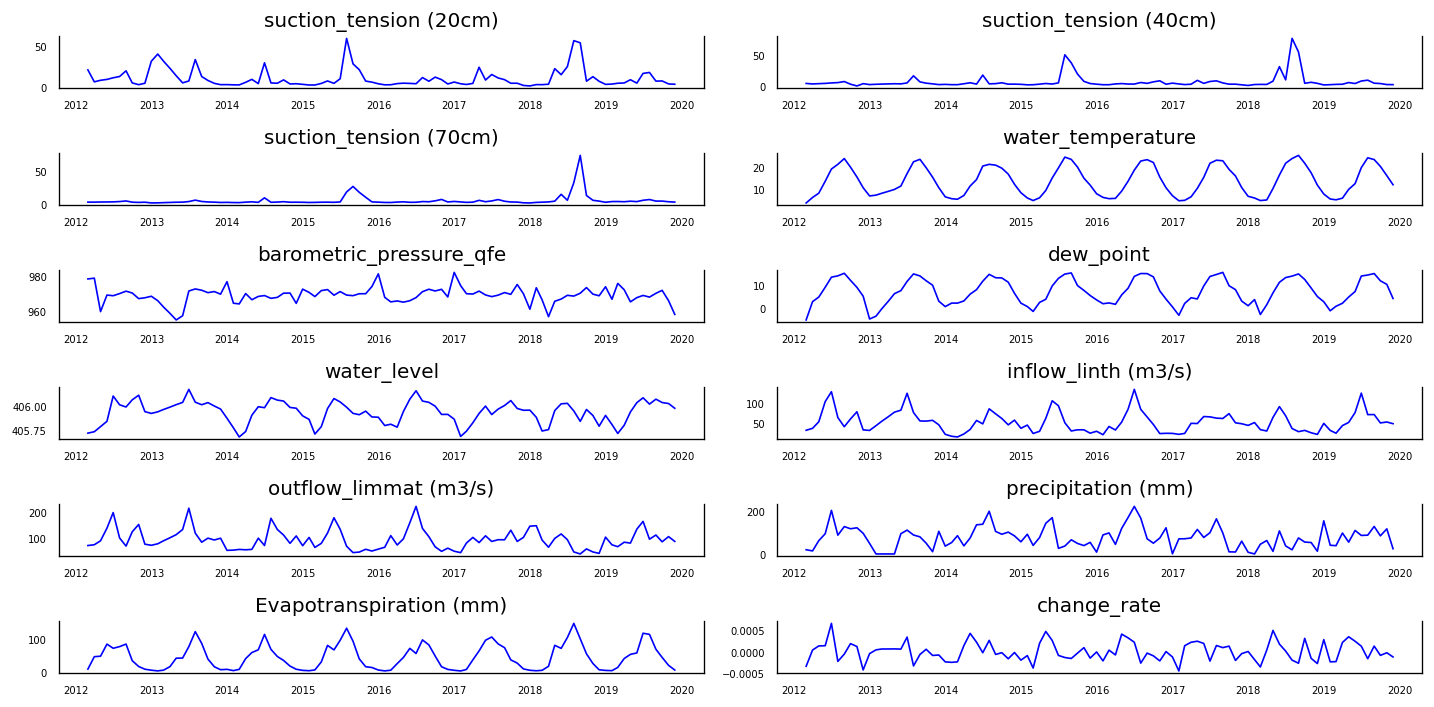

In [4]:
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(12,6))
for i, ax in enumerate(axes.flatten()):
    data2 = dvar2[dvar2.columns[i]]
    ax.plot(data2, color='blue', linewidth=1)
    # Decorations
    ax.set_title(dvar2.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [5]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [6]:
for name, column in dvar2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "suction_tension (20cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5499
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (40cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.553
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (70cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

In [7]:
dvar2_diff = dvar2.diff().dropna()

In [8]:
for name, column in dvar2_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "suction_tension (20cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7853
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (40cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.2456
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (70cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

In [9]:
def ts_train_test_split(dvar2_diff, test_size):
    len_test = int(dvar2_diff.shape[0]*test_size)
    split_point = dvar2_diff.index[-len_test]
    dvar2_diff_train = dvar2_diff[dvar2_diff.index < split_point]
    dvar2_diff_test = dvar2_diff[dvar2_diff.index >= split_point]
    
    return dvar2_diff_train, dvar2_diff_test


In [10]:
dvar2_diff_train, dvar2_diff_test = ts_train_test_split(dvar2_diff, 0.25)
dvar2_diff_test

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2018-01-31,1.694029,1.511607,0.835005,-0.767125,11.967546,2.738463,-0.075200,7.080048,1.719680,-7.8,-1.49,-0.000189
2018-02-28,-0.097716,0.188473,0.331269,-1.141097,-6.741225,-6.632825,-0.144492,-17.602506,-55.311078,45.4,1.36,-0.000171
2018-03-31,0.564816,-0.061581,0.379871,0.269790,-9.392435,4.371265,0.015150,-3.302561,-27.397755,17.4,12.41,0.000393
2018-04-30,19.283860,5.252062,1.161701,5.148781,8.594439,5.245644,0.200103,33.693539,33.888246,-50.7,64.78,0.000456
2018-05-31,-7.458785,23.139842,10.306623,6.069900,1.240727,4.691625,0.071001,26.602478,17.105472,95.7,-9.47,-0.000318
2018-06-30,10.015607,-21.028432,-8.994210,5.297314,2.084310,2.104820,0.005155,-22.610792,-22.083030,-70.2,33.65,-0.000162
2018-07-31,32.143800,66.319248,26.547845,2.118350,-0.431464,0.647424,-0.080269,-31.642829,-47.129839,-18.1,43.47,-0.000210
2018-08-31,-2.647198,-21.719039,41.192549,1.421551,1.614924,0.968314,-0.109417,-7.679007,-7.760074,55.5,-47.53,-0.000072
2018-09-30,-47.604572,-50.123907,-60.502680,-3.531760,3.157859,-2.463035,0.125027,3.136918,19.463852,-19.4,-46.35,0.000578


In [11]:
dvar2_diff_train

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2012-03-31,-14.810530,-0.825343,-0.027169,2.461499,0.434471,8.140153,0.015055,4.864362,3.077784,-5.5,38.45,0.000378
2012-04-30,1.941094,0.466359,0.191824,1.940374,-18.671426,2.033449,0.053538,16.226531,15.149216,48.0,1.39,0.000095
2012-05-31,1.074547,0.410547,0.057392,5.354580,9.242645,4.345496,0.055867,50.020461,48.683374,32.4,37.34,0.000006
2012-06-30,2.028480,0.743759,0.146260,5.510763,-0.375122,4.492238,0.266350,24.345997,59.928539,109.2,-12.82,0.000519
2012-07-31,1.577866,0.537738,0.465725,2.114383,1.197664,0.583104,-0.092051,-63.954270,-97.794102,-116.0,5.13,-0.000883
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,-2.095833,-3.341945,-2.541979,-0.262066,1.435349,0.933956,0.037809,-0.943166,-0.330459,-66.3,-11.61,-0.000049
2017-09-30,-4.461360,-1.987575,-1.132294,-3.851952,-0.986246,-5.931367,0.051941,12.042138,36.990679,-88.0,-37.65,0.000035
2017-10-31,0.022865,-0.006620,-0.129874,-2.981997,5.491325,-1.735460,-0.083347,-22.789752,-43.329115,-0.7,-9.96,-0.000333


In [12]:
def ts_train_test_split(dvar2, test_size):
    len_test = int(dvar2.shape[0]*test_size)
    split_point = dvar2.index[-len_test]
    dvar2_train = dvar2[dvar2.index < split_point]
    dvar2_test = dvar2[dvar2.index >= split_point]
    
    return dvar2_train, dvar2_test

In [76]:
dvar2_train, dvar2_test = ts_train_test_split(dvar2, 0.25)
dvar2_train

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2012-02-29,20.929298,4.169540,2.347845,3.763932,978.118839,-5.502229,405.714322,32.760742,71.399478,19.7,7.50,-0.000341
2012-03-31,6.118768,3.344197,2.320676,6.225431,978.553310,2.637923,405.729378,37.625103,74.477262,14.2,45.95,0.000037
2012-04-30,8.059861,3.810556,2.512500,8.165806,959.881884,4.671373,405.782916,53.851635,89.626478,62.2,47.34,0.000132
2012-05-31,9.134409,4.221102,2.569892,13.520385,969.124530,9.016868,405.838784,103.872095,138.309852,94.6,84.68,0.000138
2012-06-30,11.162889,4.964861,2.716153,19.031148,968.749407,13.509106,406.105133,128.218092,198.238391,203.8,71.86,0.000656
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,8.839113,4.988633,3.657752,22.737571,970.511349,15.635421,406.005469,61.983670,93.526250,97.9,73.69,0.000093
2017-09-30,4.377752,3.001058,2.525459,18.885619,969.525102,9.704053,406.057411,74.025808,130.516929,9.9,36.04,0.000128
2017-10-31,4.400617,2.994438,2.395584,15.903622,975.016427,7.968594,405.974063,51.236056,87.187814,9.2,26.08,-0.000205


In [77]:
dvar2_test

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2018-01-31,2.726957,2.440768,1.918061,5.986136,973.192551,3.551315,405.881325,51.950534,147.687411,0.0,2.46,-0.000185
2018-02-28,2.629241,2.629241,2.249330,4.845040,966.451327,-3.081510,405.736833,34.348028,92.376333,45.4,3.82,-0.000356
2018-03-31,3.194057,2.567660,2.629202,5.114830,957.058892,1.289754,405.751983,31.045468,64.978578,62.8,16.23,0.000037
2018-04-30,22.477917,7.819722,3.790903,10.263611,965.653331,6.535398,405.952086,64.739007,98.866824,12.1,81.01,0.000493
2018-05-31,15.019132,30.959565,14.097525,16.333511,966.894058,11.227023,406.023086,91.341485,115.972295,107.8,71.54,0.000175
2018-06-30,25.034739,9.931133,5.103315,21.630825,968.978368,13.331843,406.028242,68.730693,93.889266,37.6,105.19,0.000013
2018-07-31,57.178539,76.250380,31.651160,23.749175,968.546903,13.979267,405.947973,37.087863,46.759427,19.5,148.66,-0.000198
2018-08-31,54.531341,54.531341,72.843709,25.170726,970.161827,14.947580,405.838556,29.408857,38.999353,75.0,101.13,-0.000270
2018-09-30,6.926769,4.407434,12.341029,21.638965,973.319687,12.484545,405.963584,32.545774,58.463205,55.6,54.78,0.000308


In [78]:
from statsmodels.tsa.vector_ar.var_model import VAR # imports VAR

In [79]:
varmodel2 = VAR(dvar2_diff_train)
varmodel2.select_order(maxlags=4).summary()

c:\Users\lunam\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,15.90,16.29,8.001e+06,16.05
1,-2.399,2.777,0.09672,-0.3535
2,-3.664,6.289,0.04129,0.2693
3,-6.951,7.779,0.005537,-1.130
4,-16.78*,2.733*,8.694e-06*,-9.067*


In [80]:
# creating a walk forward fuction that will split a time series into training and testing set, and return a tuple of the test set 
# and the predicited test set
def walk_forward_VAR(dvar2_diff, test_size, lag_order):
    # splitting the data into train and test set
    dvar2_diff_train, dvar2_diff_test = ts_train_test_split(dvar2_diff, test_size)
 
    # makes a list of lists from the train set
    history = [list(x) for x in np.array(dvar2_diff_train)] 
    forecasts = [] # empty list to store our forecasts
    
    for t in range(dvar2_diff_test.shape[0]): # for each test set,
        # initialize a VAR model on the train set,
        model = VAR(np.array(history)) 
        model_fit = model.fit(lag_order) # fits the model
        
        # forecast just the next time step
        yhat = model_fit.forecast(model.y, steps=1)
        
        # add the forecast to the forecasts list
        forecasts.append(list(yhat[0])) 
        
        # add the actual test value as the last observation of the 
        # train set
        history.append(list(np.array(dvar2_diff_test)[t])) 
            
    # return a tuple of the test set and the predicited test set as
    # a tuple of dataframes 
    return dvar2_diff_test, pd.DataFrame(np.array(forecasts), index=dvar2_diff_test.index, columns=dvar2.columns)

In [81]:
dvar2_results_test, dvar2_results_pred = walk_forward_VAR(dvar2_diff, 0.25, 2)
dvar2_results_test

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2018-01-31,1.694029,1.511607,0.835005,-0.767125,11.967546,2.738463,-0.075200,7.080048,1.719680,-7.8,-1.49,-0.000189
2018-02-28,-0.097716,0.188473,0.331269,-1.141097,-6.741225,-6.632825,-0.144492,-17.602506,-55.311078,45.4,1.36,-0.000171
2018-03-31,0.564816,-0.061581,0.379871,0.269790,-9.392435,4.371265,0.015150,-3.302561,-27.397755,17.4,12.41,0.000393
2018-04-30,19.283860,5.252062,1.161701,5.148781,8.594439,5.245644,0.200103,33.693539,33.888246,-50.7,64.78,0.000456
2018-05-31,-7.458785,23.139842,10.306623,6.069900,1.240727,4.691625,0.071001,26.602478,17.105472,95.7,-9.47,-0.000318
2018-06-30,10.015607,-21.028432,-8.994210,5.297314,2.084310,2.104820,0.005155,-22.610792,-22.083030,-70.2,33.65,-0.000162
2018-07-31,32.143800,66.319248,26.547845,2.118350,-0.431464,0.647424,-0.080269,-31.642829,-47.129839,-18.1,43.47,-0.000210
2018-08-31,-2.647198,-21.719039,41.192549,1.421551,1.614924,0.968314,-0.109417,-7.679007,-7.760074,55.5,-47.53,-0.000072
2018-09-30,-47.604572,-50.123907,-60.502680,-3.531760,3.157859,-2.463035,0.125027,3.136918,19.463852,-19.4,-46.35,0.000578


In [82]:
dvar2_results_pred

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2018-01-31,9.171418,3.599673,1.484472,0.589326,6.320963,0.269215,-0.102356,3.503490,-31.362980,-19.335813,32.769540,-0.000255
2018-02-28,-2.919532,-3.816273,-1.223938,-1.542601,-4.377921,-3.752149,0.005265,-6.718157,-6.039151,89.924262,9.965710,0.000198
2018-03-31,-2.374321,-3.066647,-1.254788,-1.223541,-1.400174,2.323148,0.074074,-2.821537,29.200622,-58.259591,-8.873390,0.000539
2018-04-30,-11.620898,-4.234763,-2.288623,1.609503,-0.699795,4.222086,0.181110,50.020836,91.218081,8.346393,11.120364,0.000409
2018-05-31,7.683772,4.604362,1.813945,7.013038,-3.749471,0.896271,0.149130,46.348029,56.454659,107.924154,23.716451,-0.000126
2018-06-30,-15.151181,-11.543816,3.219084,2.232409,-8.826410,3.203467,-0.107353,-21.995766,-18.961888,45.083387,6.366171,-0.000439
2018-07-31,20.783947,34.087389,14.315929,2.933835,10.844708,2.955511,-0.021501,-36.156210,-80.132225,-146.229576,-10.914892,-0.000065
2018-08-31,-44.634441,-69.043243,-19.192294,0.088747,-2.361602,2.444952,0.034663,5.236612,25.227090,79.197490,-79.218790,0.000283
2018-09-30,-49.466719,-51.624053,-36.380011,2.261324,-26.416630,1.891076,-0.379280,10.052514,52.002217,340.250117,-71.315368,-0.000665


In [83]:
def invert_transformation(dvar2_test, dvar2_results_test, first_diff=False): #first diff? or second diff?
    dvar_fc = dvar2_results_test.copy()
    columns = dvar2_test.columns
    for col in columns:        
        dvar_fc[col] = dvar2_test[col].iloc[-1] + dvar_fc[col].cumsum()
    return dvar_fc

In [84]:
dvar_results1 = invert_transformation(dvar2_test, dvar2_results_test, first_diff=True)        
dvar_results1

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2018-01-31,4.822534,3.744232,3.232534,11.186157,970.274612,6.775426,405.900916,56.157657,88.960001,16.6,3.27,-3.120170e-04
2018-02-28,4.724818,3.932705,3.563803,10.045061,963.533387,0.142600,405.756424,38.555151,33.648923,62.0,4.63,-4.827717e-04
2018-03-31,5.289634,3.871124,3.943675,10.314851,954.140952,4.513865,405.771574,35.252591,6.251168,79.4,17.04,-8.943655e-05
2018-04-30,24.573493,9.123186,5.105376,15.463632,962.735391,9.759509,405.971677,68.946130,40.139414,28.7,81.82,3.663899e-04
2018-05-31,17.114708,32.263028,15.411998,21.533532,963.976118,14.451134,406.042678,95.548608,57.244886,124.4,72.35,4.812381e-05
2018-06-30,27.130316,11.234596,6.417788,26.830846,966.060428,16.555954,406.047833,72.937816,35.161856,54.2,106.00,-1.140783e-04
2018-07-31,59.274116,77.553844,32.965633,28.949196,965.628964,17.203377,405.967565,41.294987,-11.967983,36.1,149.47,-3.244680e-04
2018-08-31,56.626918,55.834805,74.158182,30.370747,967.243888,18.171691,405.858148,33.615980,-19.728056,91.6,101.94,-3.963100e-04
2018-09-30,9.022346,5.710897,13.655502,26.838987,970.401747,15.708656,405.983175,36.752898,-0.264205,72.2,55.59,1.812960e-04


In [85]:
def invert_transformation(dvar2_train, dvar2_results_pred, first_diff=False): #first diff? or second diff?
    dvar_fc = dvar2_results_pred.copy()
    columns = dvar2_train.columns
    for col in columns:        
        dvar_fc[col] = dvar2_train[col].iloc[-1] + dvar_fc[col].cumsum()
    return dvar_fc

In [86]:
dvar_results2 = invert_transformation(dvar2_train, dvar2_results_pred, first_diff=True)        
dvar_results2

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2018-01-31,10.204346,4.528834,2.567528,7.342588,967.545968,1.082067,405.854169,48.373976,114.604751,-11.535813,36.719540,-0.000252
2018-02-28,7.284814,0.712562,1.343590,5.799986,963.168047,-2.670082,405.859434,41.655820,108.565600,78.388449,46.685250,-0.000054
2018-03-31,4.910493,-2.354085,0.088802,4.576445,961.767873,-0.346934,405.933508,38.834283,137.766222,20.128858,37.811860,0.000485
2018-04-30,-6.710405,-6.588848,-2.199821,6.185948,961.068078,3.875152,406.114618,88.855119,228.984303,28.475252,48.932224,0.000894
2018-05-31,0.973367,-1.984486,-0.385876,13.198986,957.318606,4.771423,406.263748,135.203148,285.438962,136.399406,72.648675,0.000768
2018-06-30,-14.177814,-13.528302,2.833208,15.431396,948.492196,7.974889,406.156395,113.207381,266.477074,181.482793,79.014846,0.000328
2018-07-31,6.606133,20.559088,17.149138,18.365231,959.336904,10.930401,406.134894,77.051171,186.344849,35.253217,68.099954,0.000263
2018-08-31,-38.028308,-48.484155,-2.043156,18.453979,956.975302,13.375353,406.169557,82.287783,211.571939,114.450707,-11.118836,0.000546
2018-09-30,-87.495027,-100.108208,-38.423167,20.715303,930.558672,15.266430,405.790277,92.340297,263.574156,454.700824,-82.434204,-0.000119


<AxesSubplot: xlabel='datetime'>

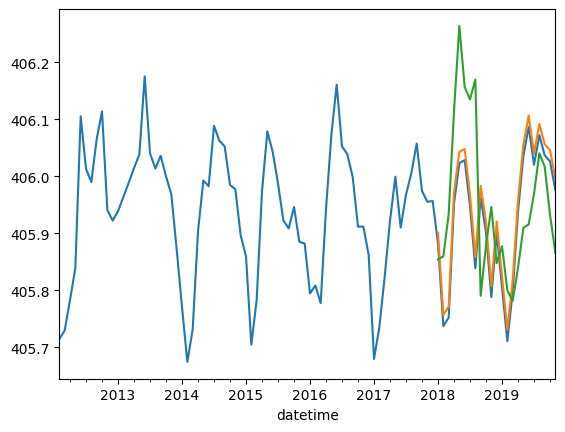

In [87]:
import matplotlib.pyplot as plt
dvar2["water_level"].plot()
dvar_results1["water_level"].plot()
dvar_results2["water_level"].plot()

<AxesSubplot: xlabel='datetime'>

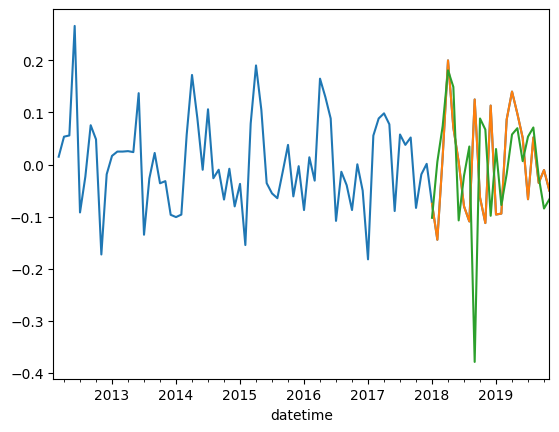

In [90]:
dvar2["water_level"].diff().plot()
dvar2_results_test["water_level"].plot()
dvar2_results_pred["water_level"].plot()